

# Compare the different ICA algorithms in MNE

Different ICA algorithms are fit to raw MEG data, and the corresponding maps
are displayed.


In [ ]:
# Authors: Pierre Ablin <pierreablin@gmail.com>
#
# License: BSD-3-Clause
# Copyright the MNE-Python contributors.

In [1]:
from time import time

import mne
from mne.datasets import sample
from mne.preprocessing import ICA

print(__doc__)

ModuleNotFoundError: No module named 'mne'

In [37]:
import numpy as np

X = np.random.rand(71, 10000)

for i in range(10):
    t0 = time()
    np.tanh(X)
    fit_time = time() - t0
    print(fit_time)



0.007930755615234375
0.0059680938720703125
0.004603147506713867
0.00409698486328125
0.0035619735717773438
0.0034589767456054688
0.0032188892364501953
0.0030760765075683594
0.002906322479248047
0.002863168716430664


In [53]:
import numpy as np
import timeit

X = np.random.rand(71, 76913)
print(timeit.timeit(lambda: np.tanh(X), number=100) / 100)


0.011232982079998238


In [38]:
??ICA

# .. note:: Picard can be used to solve the same problems as FastICA,
#           Infomax, and extended Infomax, but typically converges faster
#           than either of those methods. To make use of Picard's speed while
#           still obtaining the same solution as with other algorithms, you
#           need to specify ``method='picard'`` and ``fit_params`` as a
#           dictionary with the following combination of keys:

#           - ``dict(ortho=False, extended=False)`` for Infomax
#           - ``dict(ortho=False, extended=True)`` for extended Infomax
#           - ``dict(ortho=True, extended=True)`` for FastICA

Read and preprocess the data. Preprocessing consists of:

- MEG channel selection
- 1-30 Hz band-pass filter



In [8]:
data_path = sample.data_path()
meg_path = data_path / "MEG" / "sample"
raw_fname = meg_path / "sample_audvis_filt-0-40_raw.fif"

raw = mne.io.read_raw_fif(raw_fname).crop(0, 60).pick("meg").load_data()

reject = dict(mag=5e-12, grad=4000e-13)
raw.filter(1, 30, fir_design="firwin")

Opening raw data file /Users/caleblee/mne_data/MNE-sample-data/MEG/sample/sample_audvis_filt-0-40_raw.fif...
    Read a total of 4 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
        Average EEG reference (1 x 60)  idle
    Range : 6450 ... 48149 =     42.956 ...   320.665 secs
Ready.
Reading 0 ... 9009  =      0.000 ...    59.999 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 497 samples (3.310 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.0s


<Raw | sample_audvis_filt-0-40_raw.fif, 306 x 9010 (60.0 s), ~24.2 MB, data loaded>

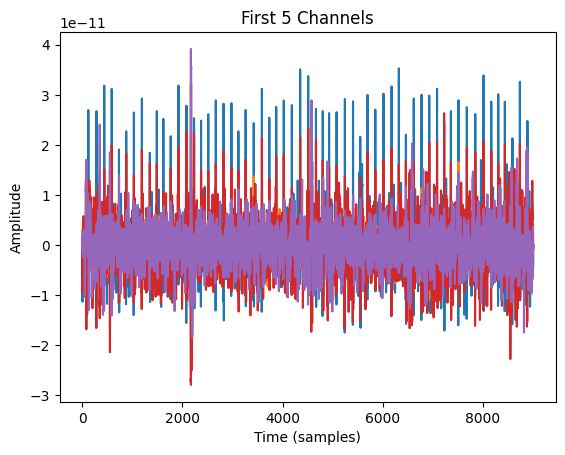

In [14]:
import matplotlib.pyplot as plt

data = raw.get_data()
plt.plot(data[:5].T)
plt.title("First 5 Channels")
plt.xlabel("Time (samples)")
plt.ylabel("Amplitude")
plt.show()

In [18]:
data.shape

(306, 9010)

Define a function that runs ICA on the raw MEG data and plots the components



In [24]:
def run_ica(method, fit_params=None):
    ica = ICA(
        n_components=20,
        method=method,
        fit_params=fit_params,
        max_iter="auto",
        random_state=0,
    )
    t0 = time()
    ica.fit(raw, reject=reject)
    fit_time = time() - t0
    title = f"ICA decomposition using {method} (took {fit_time:.1f}s)"
    ica.plot_components(title=title)

# ICA

In [ ]:
ica.fit(raw, reject=reject)

In [32]:
raw

<Raw | sample_audvis_filt-0-40_raw.fif, 306 x 9010 (60.0 s), ~24.2 MB, data loaded>

FastICA



Fitting ICA to data using 305 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 0.2s.


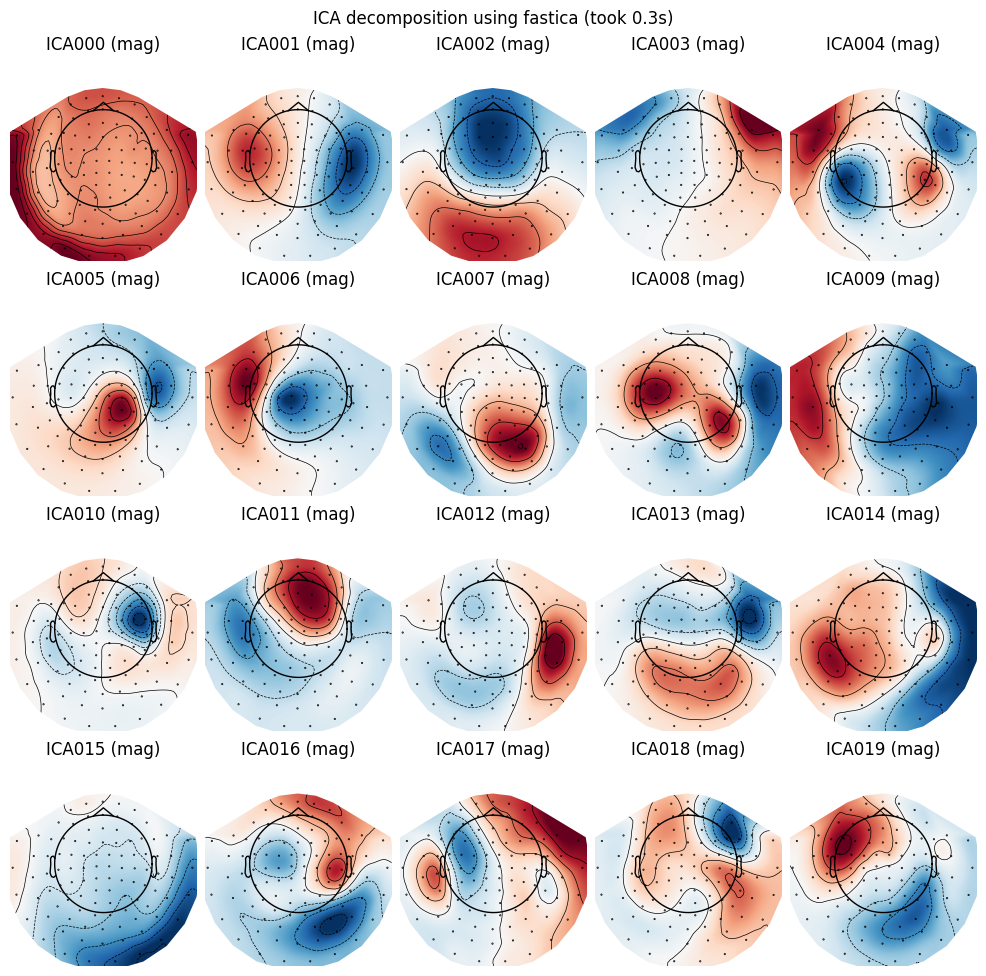

In [30]:
run_ica("fastica")

Picard



Fitting ICA to data using 305 channels (please be patient, this may take a while)
Selecting by number: 20 components
Computing Infomax ICA
step 1 - lrate 0.001669, wchange 22.54437988, angledelta  0.0 deg
step 2 - lrate 0.001669, wchange 8.65444480, angledelta  0.0 deg
step 3 - lrate 0.001669, wchange 3.93553348, angledelta 95.1 deg
step 4 - lrate 0.001502, wchange 2.69340334, angledelta 91.8 deg
step 5 - lrate 0.001352, wchange 2.19936008, angledelta 95.5 deg
step 6 - lrate 0.001217, wchange 1.64858878, angledelta 101.7 deg
step 7 - lrate 0.001095, wchange 1.38757988, angledelta 101.9 deg
step 8 - lrate 0.000986, wchange 1.08866800, angledelta 108.4 deg
step 9 - lrate 0.000887, wchange 0.91976237, angledelta 102.4 deg
step 10 - lrate 0.000798, wchange 0.84347184, angledelta 113.9 deg
step 11 - lrate 0.000718, wchange 0.71493741, angledelta 105.0 deg
step 12 - lrate 0.000647, wchange 0.74834616, angledelta 117.0 deg
step 13 - lrate 0.000582, wchange 0.54217135, angledelta 111.6 deg
ste

step 123 - lrate 0.000000, wchange 0.00000000, angledelta 73.8 deg
step 124 - lrate 0.000000, wchange 0.00000000, angledelta 79.8 deg
step 125 - lrate 0.000000, wchange 0.00000000, angledelta 78.7 deg
step 126 - lrate 0.000000, wchange 0.00000000, angledelta 80.1 deg
step 127 - lrate 0.000000, wchange 0.00000000, angledelta 81.2 deg
Fitting ICA took 0.9s.


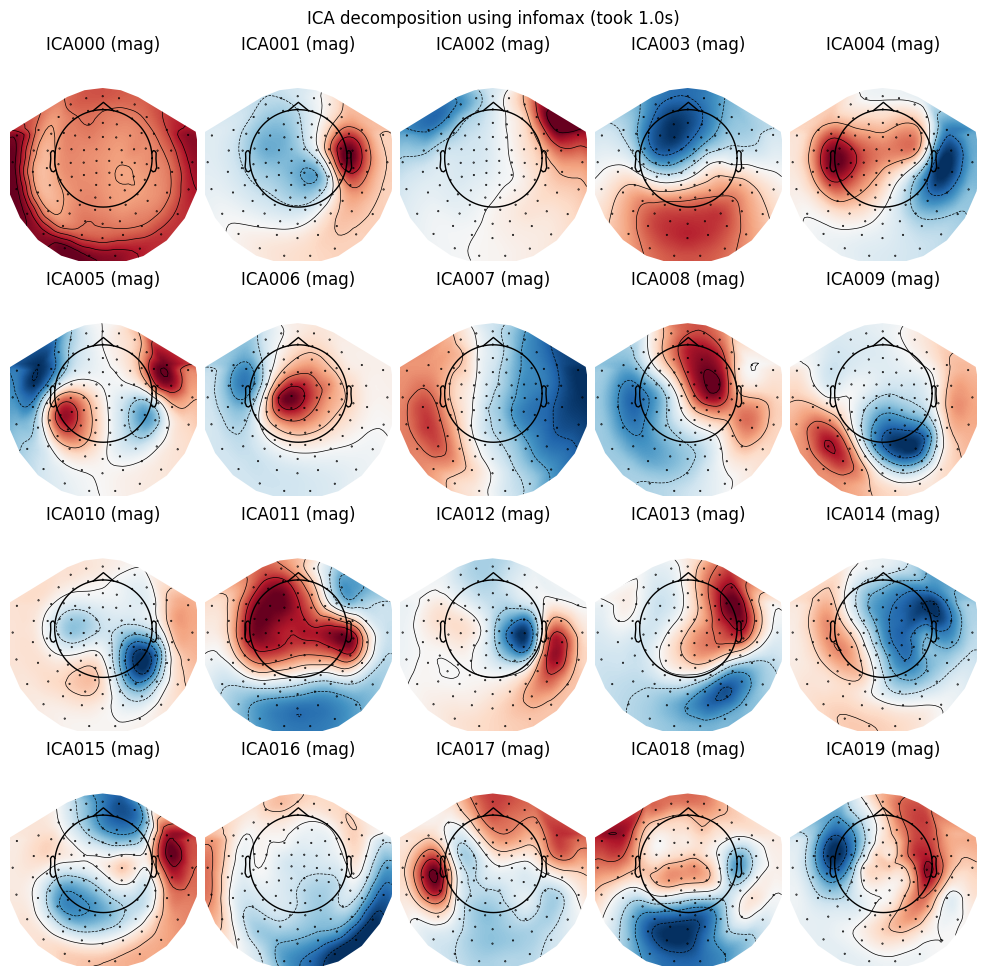

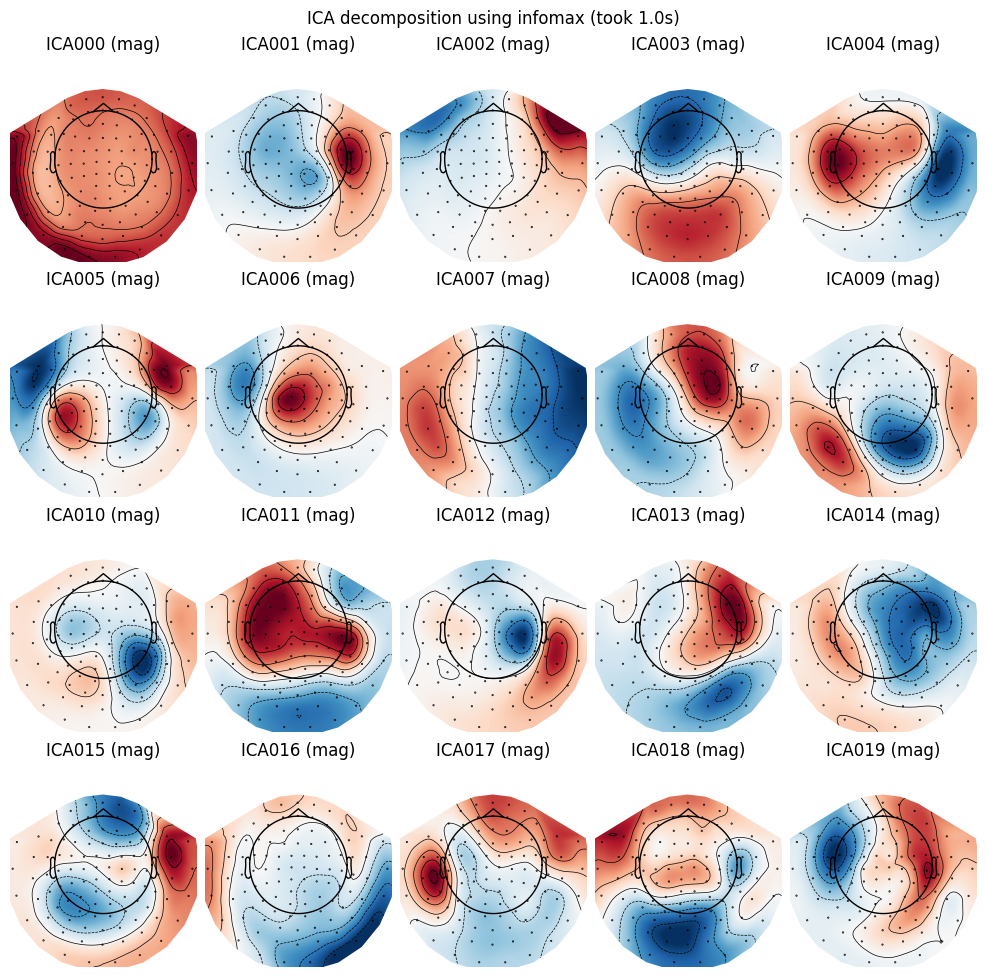

In [45]:
# run_ica("picard", dict(ortho=False, extended=False))


# .. note:: Picard can be used to solve the same problems as FastICA,
#           Infomax, and extended Infomax, but typically converges faster
#           than either of those methods. To make use of Picard's speed while
#           still obtaining the same solution as with other algorithms, you
#           need to specify ``method='picard'`` and ``fit_params`` as a
#           dictionary with the following combination of keys:

#           - ``dict(ortho=False, extended=False)`` for Infomax
#           - ``dict(ortho=False, extended=True)`` for extended Infomax
#           - ``dict(ortho=True, extended=True)`` for FastICA

method="infomax"


ica = ICA(
    n_components=20,
    method=method,
#     fit_params=dict(ortho=False, extended=False, verbose=True),
    max_iter="auto",
    random_state=0,
#     verbose=true,
    fit_params = dict(verbose=True),
)
t0 = time()
ica.fit(raw, reject=reject)
fit_time = time() - t0
title = f"ICA decomposition using {method} (took {fit_time:.1f}s)"
ica.plot_components(title=title)

In [22]:
ica.unmixing_matrix_.shape

(20, 20)

In [44]:
ica.n_iter_

77

Fitting ICA to data using 305 channels (please be patient, this may take a while)
Selecting by number: 20 components
Computing Infomax ICA
Fitting ICA took 0.8s.


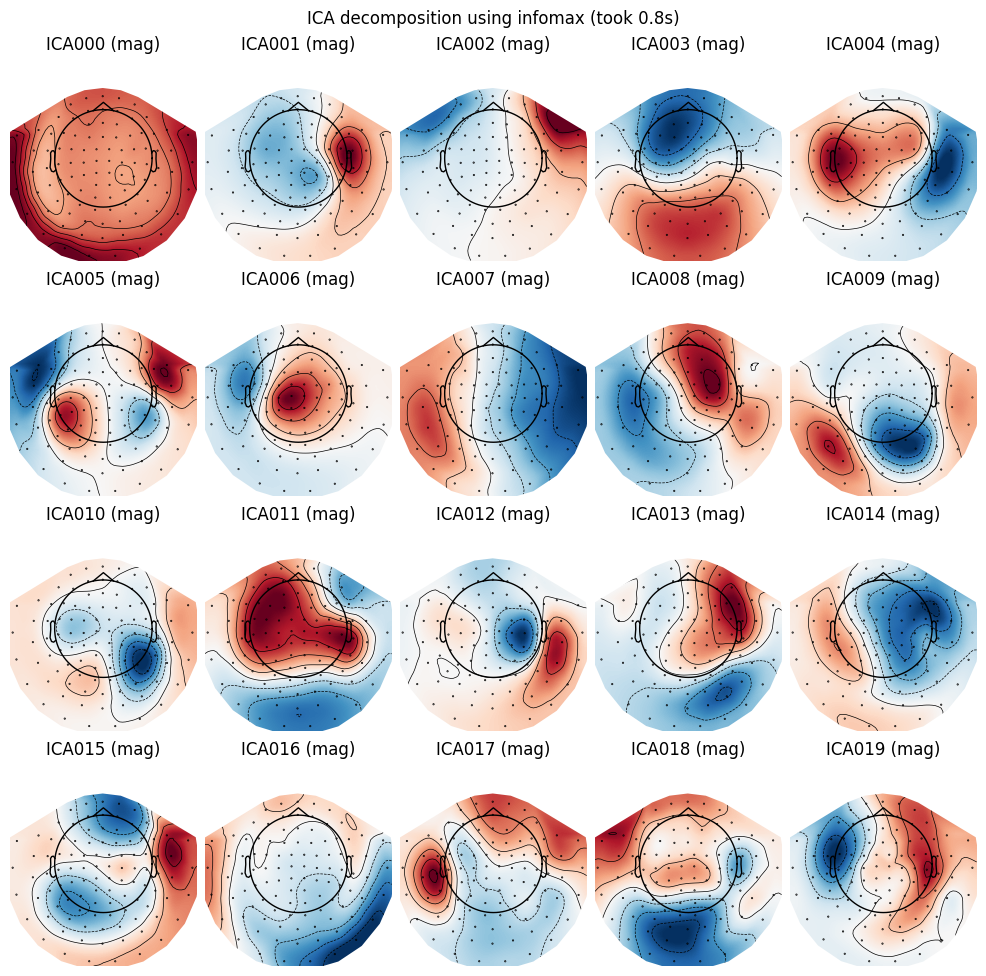

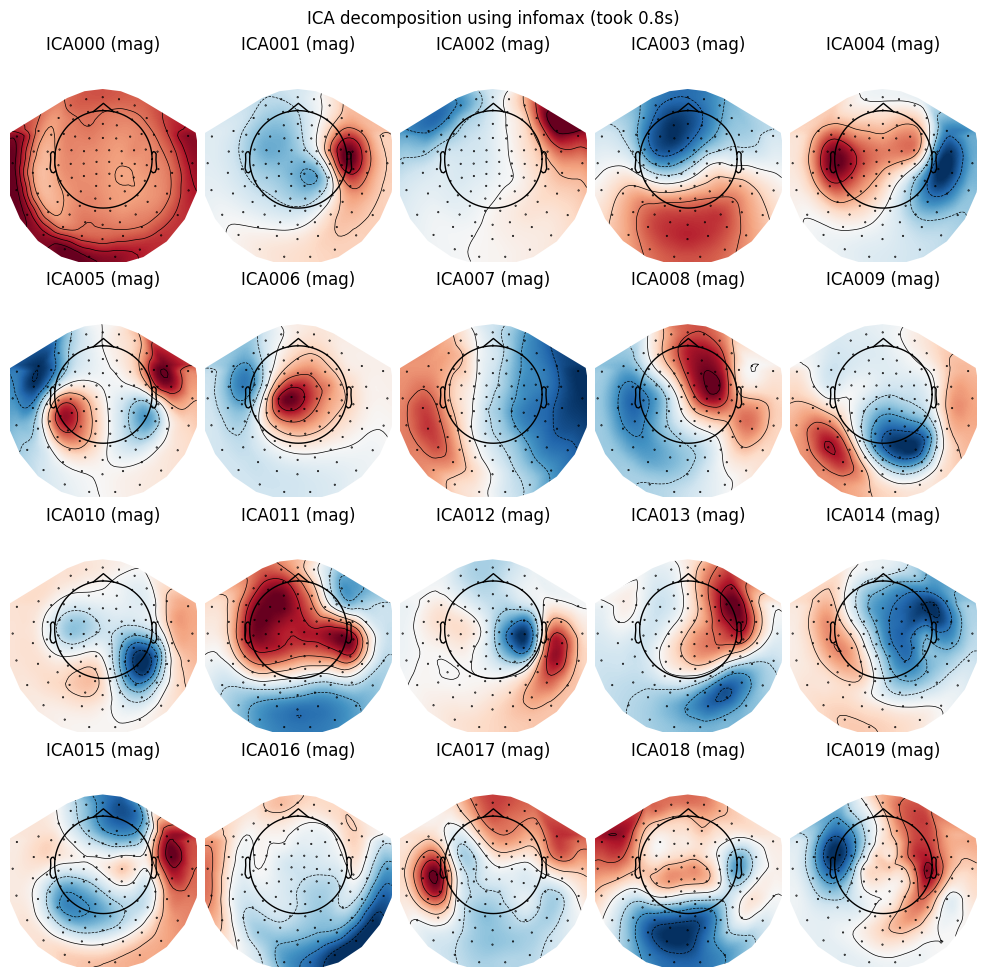

In [35]:
method="infomax"


ica = ICA(
    n_components=20,
    method=method,
    fit_params=None,
    max_iter=500000,
    random_state=0,
#     fit_params = dict(ortho=False, extended=False),
)
t0 = time()
ica.fit(raw, reject=reject)
fit_time = time() - t0
title = f"ICA decomposition using {method} (took {fit_time:.1f}s)"
ica.plot_components(title=title)

In [41]:
ica.get_components

<bound method ICA.get_components of <ICA | raw data decomposition, method: infomax (fit in 500000 iterations on 8729 samples), 20 ICA components (305 PCA components available), channel types: mag, grad, no sources marked for exclusion>>

Infomax



Fitting ICA to data using 305 channels (please be patient, this may take a while)
Selecting by number: 20 components
Computing Infomax ICA
Fitting ICA took 0.8s.


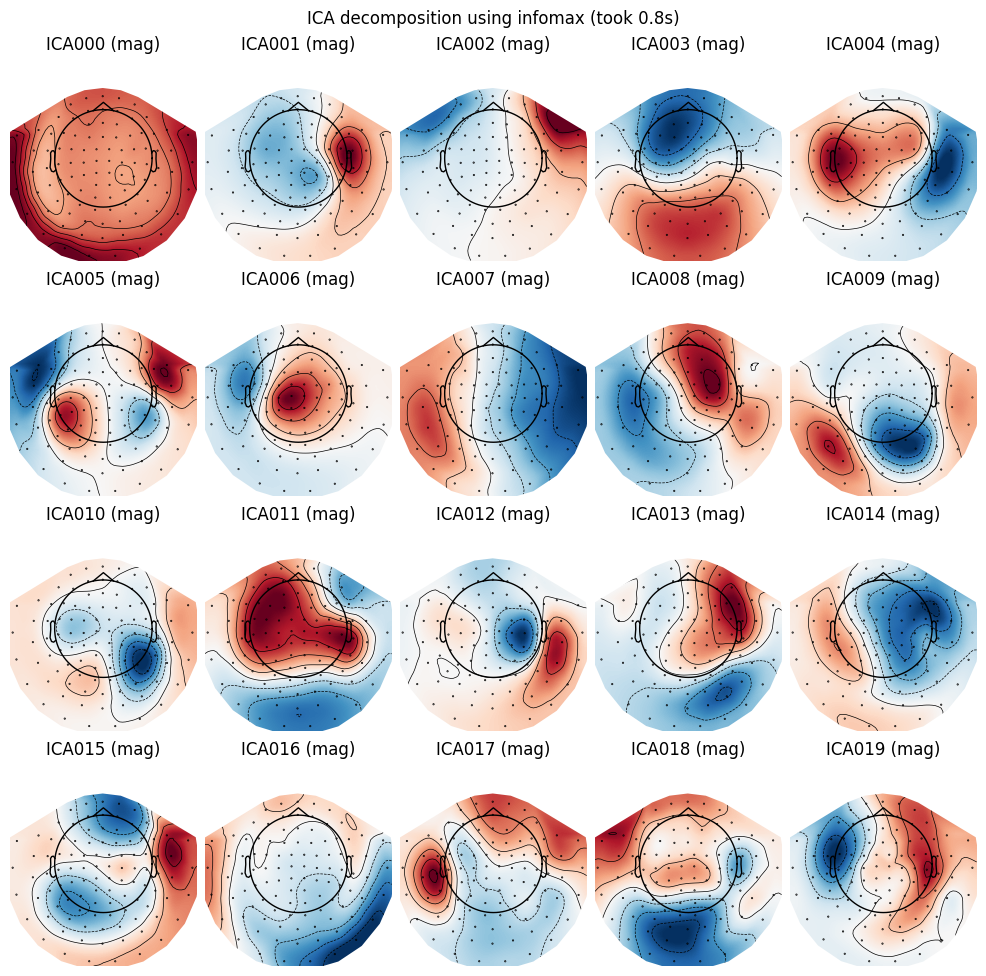

In [25]:
run_ica("infomax")

Extended Infomax



Fitting ICA to data using 305 channels (please be patient, this may take a while)
Selecting by number: 20 components
Computing Extended Infomax ICA
Fitting ICA took 1.0s.


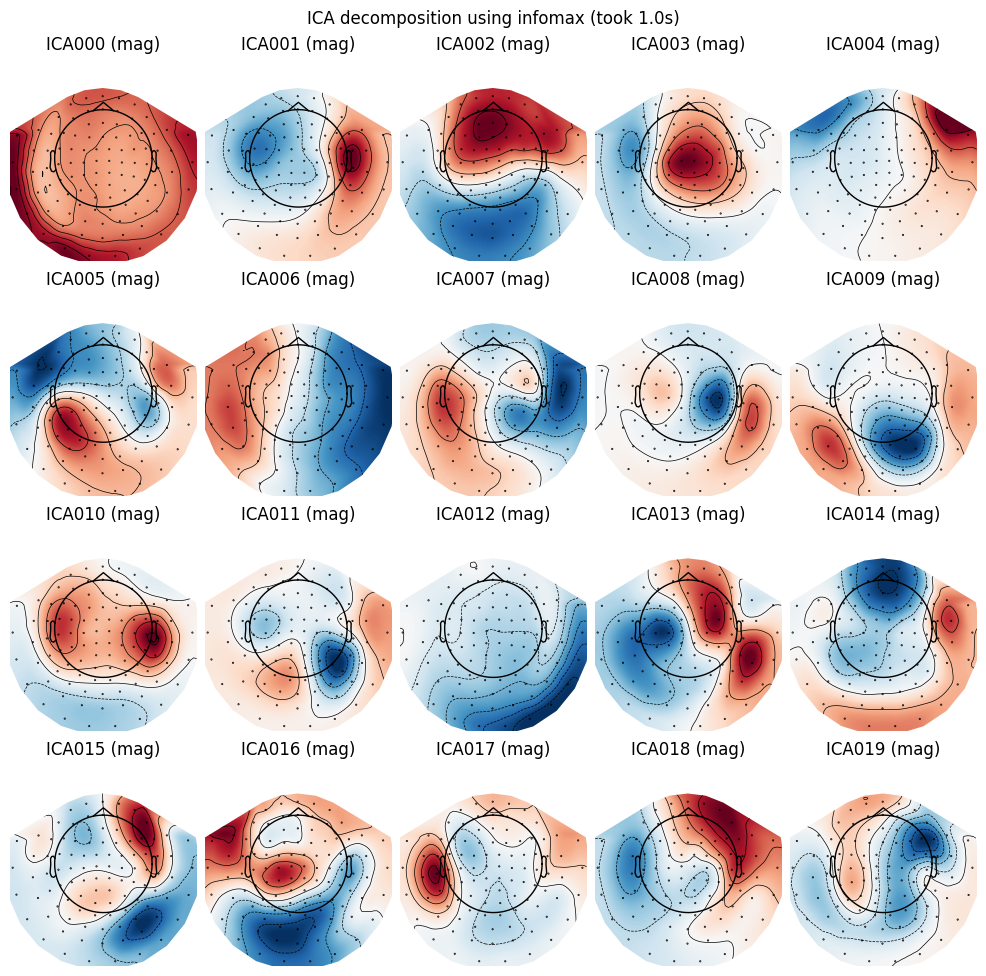

In [9]:
run_ica("infomax", fit_params=dict(extended=True))

In [ ]:
run_ica("infomax", fit_params=dict(extended=True))